# Consulta del DENUE usando INEGIpy para evaluar los OXXOs en México

El Instituto Nacional de Geografía y Estadística (INEGI) proporciona el Directorio Estadístico Nacional de Unidades Económicas (DENUE), en el cual se pueden consultar una gran variedad de establecimientos comerciales. En este proyecto haremos uso de esta herramienta para evaluar los OXXOs registrados por el INEGI en el DENUE, de manera que podamos tener un entendimiento de su distribución en el país.

In [1]:
from INEGIpy import DENUE
token = '1293712a-c167-42fa-b53d-ba52d81ca4c1'
denue = DENUE(token)
import pandas as pd

In [2]:
df_oxxo = denue.BuscarAreaAct('oxxo', clave_area='', clave_actividad='462112',registro_inicial=1,registro_final=10000,clave_establecimiento=0,estrato=0,as_geodf=True)

In [3]:
pd.set_option('display.max_columns', None)
df_oxxo.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,Colonia,CP,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,AGEB,Manzana,CLASE_ACTIVIDAD_ID,EDIFICIO_PISO,SECTOR_ACTIVIDAD_ID,SUBSECTOR_ACTIVIDAD_ID,RAMA_ACTIVIDAD_ID,SUBRAMA_ACTIVIDAD_ID,EDIFICIO,Tipo_Asentamiento,Fecha_Alta,AreaGeo,geometry
0,12030462112000102000008202S1,6850741,500AM CRUZ GRANDE OBREGON ACA,CADENA COMERCIAL OXXO SA DE CV,Comercio al por menor en minisupers,6 a 10 personas,CALLE,ÁLVARO OBREGÓN,38,,CENTRO,41800,"CRUZ GRANDE, Florencio Villarreal, GUERRERO",,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,-99.123512,16.721023,,,,0214,012,462112,,46,462,4621,46211,,COLONIA,2018-11,120300001,POINT (-99.12351 16.72102)
1,30193462112003792000008202S0,6847195,502JZ HACIENDA LA PARROQUIA VER,CADENA COMERCIAL OXXO SA DE CV,Comercio al por menor en minisupers,6 a 10 personas,CALLE,SAN GERONIMO,204,,HACIENDA LA PARROQUIA,91725,"VALENTE DÍAZ, Veracruz, VERACRUZ DE IGNACIO DE...",,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,-96.214431,19.155976,,,,3049,003,462112,,46,462,4621,46211,,FRACCIONAMIENTO,2018-03,301930087,POINT (-96.21443 19.15598)
2,10013462112000441000008202S1,6797500,503CI AUTOPISTA BERMEJILLO 2 TRC,CADENA COMERCIAL OXXO SA DE CV,Comercio al por menor en minisupers,6 a 10 personas,CARRETERA,FEDERAL DE CUOTA 49 TRAMO GOMEZ PALACIO JIMENE...,0,,BERMEJILLO,35230,"SAN SEBASTIÁN UNO, Tlahualilo, DURANGO",,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,-103.622122,25.922202,,,,076A,800,462112,,46,462,4621,46211,,LOCALIDAD,2018-03,100360190,POINT (-103.62212 25.92220)
3,15120462112000561000008202S4,6845259,503GB VIADUCTO BICENTENARIO MEX,CADENA COMERCIAL OXXO SA DE CV,Comercio al por menor en minisupers,6 a 10 personas,AVENIDA,VIADUCTO BICENTENARIO,1367,,ZUMPANGO DE OCAMPO,55600,"BARRIO DE SAN MIGUEL (CAMINO A VALLE HERMOSO),...",,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,-99.068828,19.813706,,,,0486,800,462112,,46,462,4621,46211,,COLONIA,2018-03,151200172,POINT (-99.06883 19.81371)
4,05030462112006932000008202S4,6855868,506XA VILLAS DE LA ANGOSTURA SLF,CADENA COMERCIAL OXXO SA DE CV,Comercio al por menor en minisupers,6 a 10 personas,CARRETERA,"Carretera a Concepción del Oro, Zacatecas",0,0,SANTA ELENA,25084,"SALTILLO, Saltillo, COAHUILA DE ZARAGOZA",,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,-101.022036,25.352765,,,,5770,001,462112,,46,462,4621,46211,,COLONIA,2018-11,050300001,POINT (-101.02204 25.35277)


<Axes: >

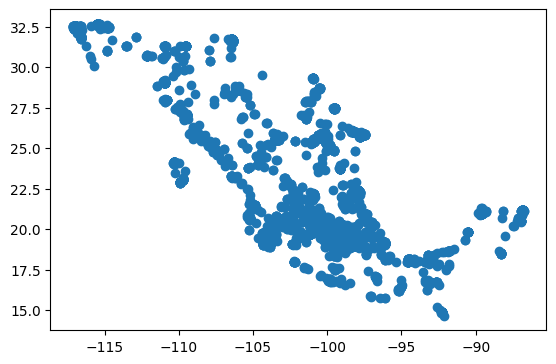

In [4]:
#visualización rápida de los datos en un mapa de México
df_oxxo.plot()

In [5]:
for column in df_oxxo.columns.values.tolist():
    print(column)

CLEE
Id
Nombre
Razon_social
Clase_actividad
Estrato
Tipo_vialidad
Calle
Num_Exterior
Num_Interior
Colonia
CP
Ubicacion
Telefono
Correo_e
Sitio_internet
Tipo
Longitud
Latitud
tipo_corredor_industrial
nom_corredor_industrial
numero_local
AGEB
Manzana
CLASE_ACTIVIDAD_ID
EDIFICIO_PISO
SECTOR_ACTIVIDAD_ID
SUBSECTOR_ACTIVIDAD_ID
RAMA_ACTIVIDAD_ID
SUBRAMA_ACTIVIDAD_ID
EDIFICIO
Tipo_Asentamiento
Fecha_Alta
AreaGeo
geometry


Necesitamos limpiar estos datos para poder analizarlos con facilidad. Para ello los manipularemos usando SQL por medio de SSMS.

In [6]:
#pasaremos nuestro dataframe a un archivo csv que pueda ser usado en MySQL
df_oxxo.to_csv(r"C:\Users\luisg\Documents\CV\portafolio\OXXO\oxxos_mexico.csv",index=False)